In [1]:
import os
import tweepy as tw
import pandas as pd
import json
import requests

def sentiment(tweets):
    url = 'http://text-processing.com/api/sentiment/'
    pos = 0
    neg = 0
    neutral = 0
    list_pos = []
    list_neg = []
    list_neutral = []
    for text in tweets:
        options = { 'text' : text}
        response = requests.post(url, data = options)
        sentiment = response.json()
        neg = neg+ sentiment['probability']['neg']
        pos = pos + sentiment['probability']['pos']
        neutral = neutral + sentiment['probability']['neutral']
        list_neg.append(sentiment['probability']['neg'])
        list_pos.append(sentiment['probability']['pos'])
        list_neutral.append(sentiment['probability']['neutral'])
    neg = neg/len(tweets)
    pos = pos/len(tweets)
    neutral = neutral/len(tweets)
    return pos,neg,neutral,list_pos,list_neg,list_neutral
def twitter_api():
    consumer_key= 'XBuKrGqxjQBWp2XOcdwGZLzcg'
    consumer_secret= 'tVdKxqrU16TJHUcEhQZnofAt6rSSuk7oCss8yjnJw6KRGUj6SU'
    access_token= '370140893-87zTUu8DCcMXzeGJ2z7gQwwRXIJXlZuRm2POa7kv'
    access_token_secret= '4D4H7iyols9M8XVy8nbo0K0YqKPsM5K3YJLPv9MKycNbT'

    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tw.API(auth, wait_on_rate_limit=True)
    return api
    
def get_trends(api):
    US_WOE_ID = 23424977
    trends1 = api.trends_place(US_WOE_ID) # from the end of your code
    # trends1 is a list with only one element in it, which is a 
    # dict which we'll put in data.
    data = trends1[0] 
    # grab the trends
    trends = data['trends']
    # grab the name from each trend
    names = [trend['name'] for trend in trends]
    return names

def get_tweets(trends,api):
    choice = 100
    tweets = []
    total_tweets = []
    for x in range(0,11):
        print("%d. %s"%(x,trends[x]))
    while(choice>10 or choice<0):
        choice = int(input("Please choose from 0-10 which trend you want to analyze: "))
    search = tw.Cursor(api.search, q=trends[choice],tweet_mode='extended').items(500)
    for item in search: 
        if item.retweet_count >100:
            tweets.append(item.full_text)
        total_tweets.append(item.full_text)
    return tweets,total_tweets
try:
    api = twitter_api()
    trends = get_trends(api)
    tweets,total_tweets = get_tweets(trends,api)
    print("Popular Tweets")
    print("Amount of popular tweets analyzed: %d"%len(tweets))
    pos,neg,neutral,list_pos,list_neg,list_neutral = sentiment(tweets)
    print("Positive: %.02f%% Negative: %.02f%% Neutral: %.02f%% "%(100*pos,100*neg,100*neutral))
    print("Total_tweets")
    print("Amount of total tweets analyzed: %d"%len(total_tweets))
    pos_t,neg_t,neutral_t,list_pos_t,list_neg_t,list_neutral_t = sentiment(total_tweets)
    print("Positive: %.02f%% Negative: %.02f%% Neutral: %.02f%% "%(100*pos_t,100*neg_t,100*neutral_t))

# cannot decode json
except json.decoder.JSONDecodeError as e: 
    print("ERROR: Cannot decode the response into json")
    print("DETAILS", e)

# response not ok
except requests.exceptions.HTTPError as e:
    print("ERROR: Response from ", url, 'was not ok.')
    print("DETAILS:", e)
        
# internet is broken
except requests.exceptions.RequestException as e: 
    print("ERROR: Cannot connect to ", url)
    print("DETAILS:", e)
    
except ValueError:
    print("You did not put in a number!")



0. #TheGameAwards
1. #FineLine
2. Sekiro
3. Lamar Jackson
4. Smash
5. Vin Diesel
6. Death Stranding
7. Wolf Among Us 2
8. Xbox Series X
9. Fast and Furious
10. #RavensFlock


Please choose from 0-10 which trend you want to analyze:  10


Popular Tweets
Amount of popular tweets analyzed: 320
Positive: 51.38% Negative: 48.62% Neutral: 39.21% 
Total_tweets
Amount of total tweets analyzed: 500
Positive: 51.93% Negative: 48.07% Neutral: 45.70% 


Total Tweets


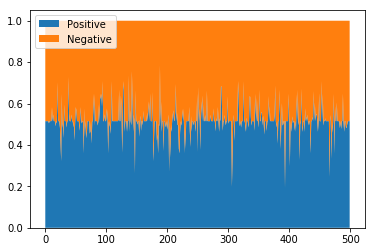

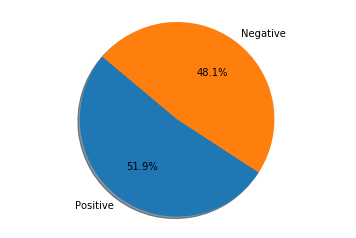

Popular Tweets


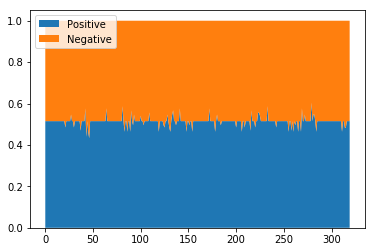

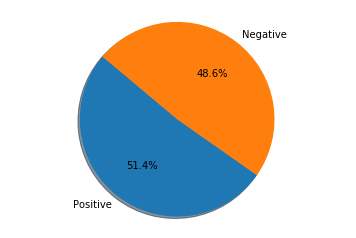

In [3]:
import matplotlib.pyplot as plt
# Basic stacked area chart.

print("Total Tweets")
x=range(0,len(total_tweets))
plt.stackplot(x,list_pos_t,list_neg_t,labels=['Positive','Negative'])
plt.legend(loc='upper left')
plt.show()

# Data to plot
labels = 'Positive','Negative'
sizes = [pos_t,neg_t]

# Plot
plt.pie(sizes,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

print("Popular Tweets")
x=range(0,len(tweets))
plt.stackplot(x,list_pos,list_neg,labels=['Positive','Negative'])
plt.legend(loc='upper left')
plt.show()

# Data to plot
labels = 'Positive','Negative'
sizes = [pos,neg]

# Plot
plt.pie(sizes,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

